# Исследование надежности заемщиков


**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
df = data.pivot_table(index = ['children'], values = ['debt'], aggfunc = ['count','sum', 'mean'])
#формируем сводную таблицу, сгруппированную по количеству детей
df.columns = df.columns.get_level_values(0)
df.index.names = ['количество детей']
df = df.rename( columns = {'count':'количество заемщиков','sum': 'общее количество задолженностей', 'mean': 'коэффициент задолженности'})
#переименовываем столбцы
df

,количество заемщиков,общее количество задолженностей,коэффициент задолженности
количество детей,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


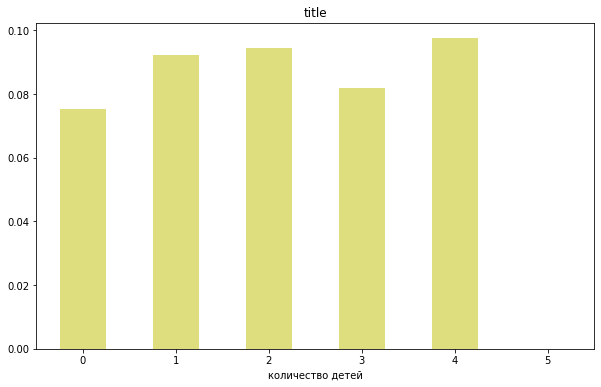

In [ ]:
import matplotlib.pyplot as plt

df['коэффициент задолженности'].plot(kind='bar', figsize=(10,6), title='title', color='y', alpha=.5, rot=0)

plt.show()

**Вывод:**
*С помощью сводной таблицы мы можем сделать вывод о том, что существует некоторая зависимость между количеством детей и задолженностью по кредиту. Таким образом, мы можем увидеть, что заемщики без детей имеют задолженность реже. Тогда, как заемщики с 4мя детьми самые неплатежеспособные. Тем не менее, нет четкости между данными  по заемщикам с детьми  в целом, например, те, у кого 3 ребенка платят кредит регулярнее тех, у кого 1 или 2. Мы не взяли в расчет заемщиков с 5ью детьми, т.к скорее всего эти данные неинформативны, поскольку сильно отличаются от остальных показателей.*

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
df_fam_st = data.pivot_table(index = ['family_status'], values = ['debt'], aggfunc = ['count','sum', 'mean'])
#формируем сводную таблицу, сгруппированную по семейному положению
df_fam_st.columns = df_fam_st.columns.get_level_values(0) #сбрасываем мультииндекс
df_fam_st.index.names = ['семейное положение'] #переименовываем столбец с индексом
df_fam_st = df_fam_st.rename( columns = {'count': 'общее количество заемщиков','sum': 'общее количество задолженностей', 'mean': 'коэффициент задолженности'})
#переименовываем столбцы
df_fam_st

,общее количество заемщиков,общее количество задолженностей,коэффициент задолженности
семейное положение,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


**Вывод:**
*Опираясь на сводную таблицу, делаем вывод о том, что самые надежные заемщики имеют статус вдова/вдовец.
Самые неплатежеспособные в данном случае не женатые/не замужние заещики.
Можем сказать, что для кредиторов лучшая ситуация, когда заемщик не одинок, но и не имеет детей.*

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
def func_income (row):

    if row<30000:
        return 'E'
    if row<50000:
        return 'D'
    if row<200000:
        return 'C'
    if row<1000000:
        return 'B'

    return 'A'# Создаем функцию для категоризации общего дохода

>Сделать статистические выводы по доходу сложно, т.к. значения дохода в таблице разные. Поэтому введем категоризацию по доходу.
Опираясь на данные таблицы, назначим диапазоны дохода таким образом:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

In [ ]:
df_income = data #перезапишем данные в новую таблицу, чтобы не изменять data
df_income['category_income'] = df_income['total_income'].apply(func_income) #добавляем новый столбец с категорией в таблицу
df_income.head() #проверим правильность работы кода

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,category_income
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,C


In [ ]:
df_income = data.pivot_table(index = ['category_income'], values = ['debt'], aggfunc = ['count','sum', 'mean'])

#формируем сводную таблицу, сгруппированную по доходу

df_income.columns = df_income.columns.get_level_values(0) #сбрасываем мультииндекс

df_income.index.names = ['категория дохода'] #переименовываем столбец с индексом

df_income = df_income.rename( columns = {'count': 'общее количество заемщиков','sum': 'общее количество задолженностей', 'mean': 'коэффициент задолженности'})

#переименовываем столбцы

df_income

,общее количество заемщиков,общее количество задолженностей,коэффициент задолженности
категория дохода,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


**Вывод:**
*Опираясь на сводную таблицу, можем сделать вывод, что заемщики с доходом выше 30000 руб. и менее 50000 руб. более надежные и реже задерживают выплаты. Тогда как заемщики с низким уровнем дохода, ниже 30000 руб. самые ненадежные. Учитывая это, можно сказать, что 30000 является пороговым значением для данной категории. При необходимости можно провести более детальное исследование и категоризацию.*

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
df_purpose = data.pivot_table(index = ['purpose_category'], values = ['debt'], aggfunc = ['count','sum', 'mean'])

#формируем сводную таблицу, сгруппированную категории цели кредита

df_purpose.columns = df_purpose.columns.get_level_values(0) #сбрасываем мультииндекс

df_purpose.index.names = ['категория цели'] #переименовываем столбец с индексом

df_purpose = df_purpose.rename( columns = {'count': 'общее количество заемщиков','sum': 'общее количество задолженностей', 'mean': 'коэффициент задолженности'})

#переименовываем столбцы

df_purpose

,общее количество заемщиков,общее количество задолженностей,коэффициент задолженности
категория цели,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Вывод:**
*Кредиты на операции с недвижимостью берут чаще, но и чаще возвращают вовремя. Самая ненадежная цель кредита - операции с автомобилем, коэффициент 0,093. Почти так же ненадежны те, кто берет кредит на образование коэффицент 0,092*

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Главными причинами отсутствия данных являются человеческий фактор и технические неполадки.  Примером ошибок, связанных с человеческим фактором могут быть, неумышленные пропуски, ошибки, опечатки, путаница в величинах и т.п. Технические ошибки связаны с неправильной выгрузкой данных, ошибками при выгрузке, смене формата данных и т.п. В нашем случае пропуски встречались в двух столбцах: days_employed, total_income, причем количество пропусков одинаково. Можно **предположить**, что кредит запрашивали люди, не работающие и никогда не работавшие. Также наличие пропусков может быть связано с потерей данных при выгрузке. Возмозможны и неумышленные пропуски данных сотрудником, например пропуск диалогового окна с этими данными и т.п.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  Мы используем медианное значение, когда есть некоторые значения, которые сильно отличаются от большинства остальных, т.к. среднее значение в этом случае может сильно повлиять на общую статистику.  
Например, в проекте на сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце о доходах необходимо медианным значением по каждому типу занятости. Медиана в данном случае лучше среднего, т.к. есть вероятность наличия  экстремальных значений (высокие или низкие) в наборе данных. В этом случаяе медиана даст более реалистичную оценку центрального значения дохода.

### Шаг 4: общий вывод.

> Самыми надежными заемщиками для банков являются овдовевшие или разведенные клиенты, с доходом 30000 - 50000 руб., не имеющие детей и оформляющие кредит с целью операций с недвижимостью.

> Самые неплатежеспособные заемщики - это одинокие люди с детьми, с низким уровнем дохода (ниже 30000 руб.), покупающие автомобиль или получающие образование.